In [21]:
import pandas as pd
import glob as g
#import math, random
#import torch
import torchaudio
from torchaudio import transforms
#from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import librosa


# audio deep learning

shamelessly copied from https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5

In [2]:
class_ids = [0,1,2]
#violin is 0
#trumpet is 1
#guitar is 2

paths_violin = g.glob('data/violin/*')
paths_guitar = g.glob('data/guitar/*')
paths_trumpet = g.glob('data/trumpet/*')

num_samples = len(paths_trumpet) + len(paths_guitar) + len(paths_violin)

paths_all = paths_violin + paths_guitar + paths_trumpet
ids_all = [0]*len(paths_trumpet) + [1]*len(paths_guitar) + [2]*len(paths_violin)

In [3]:
meta = pd.DataFrame({'path':paths_all,'class':ids_all})

In [4]:
meta

,path,class
0,data/violin/violin_D5_15_pianissimo_arco-norma...,0
1,data/violin/violin_Gs4_phrase_forte_arco-marte...,0
2,data/violin/violin_Gs4_1_fortissimo_arco-norma...,0
3,data/violin/violin_B5_025_mezzo-forte_pizz-nor...,0
4,data/violin/violin_As5_05_piano_arco-normal.mp3,0
...,...,...
2088,data/trumpet/trumpet_D4_1_pianissimo_normal.mp3,2
2089,data/trumpet/trumpet_E4_phrase_mezzo-forte_tri...,2
2090,data/trumpet/trumpet_Ds4_1_forte_normal.mp3,2
2091,data/trumpet/trumpet_D4_long_pianissimo_normal...,2


In [5]:
def load_mp3(filename):
    wf,samp = torchaudio.load(filename,format='mp3')
    return(wf,samp)

In [6]:
waveforms, sample_rates,shapes = [],[],[]

for p in (meta['path']):
    w, s = load_mp3(p)
    waveforms.append(w)
    sample_rates.append(s)
    shapes.append(np.array(w.shape))

shapes = np.array(shapes)

In [97]:
waveforms_trimmed = []

for w in waveforms:
    min_length = shapes[:,1].min()
    w_new = w[:,:min_length]
    waveforms_trimmed.append(w_new)

In [92]:
print(min_length,sr)

13824 44100


In [102]:
shapes[:,1].argmin()

469

In [104]:
meta.iloc[469]['path']

'data/violin/violin_Fs4_025_mezzo-piano_non-vibrato.mp3'

In [82]:
sr = sample_rates[0]

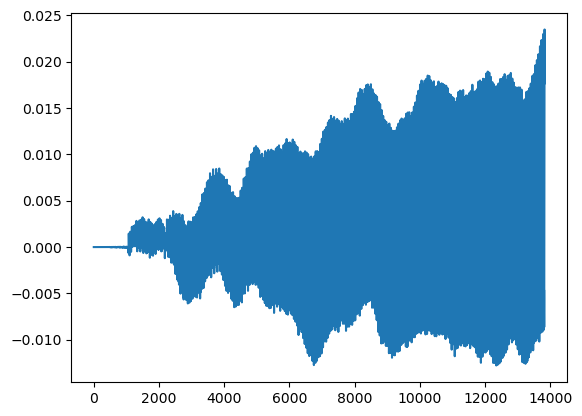

In [8]:
plt.plot(waveforms_trimmed[4].T)

In [41]:
def spectrogram(wf,sr,n_mels=64, n_fft=1024, hop_len=None):
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(wf)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)


In [48]:
test = spectrogram(waveforms_trimmed[0],sample_rates[0])

In [49]:
test.shape

torch.Size([1, 64, 28])

In [50]:
test[0]

tensor([[-67.7560, -67.7560, -19.5394,  ..., -10.7128,  -7.5202, -12.4736],
        [-67.7560, -67.7560, -20.6403,  ..., -16.9000, -16.4764,  -7.4998],
        [-67.7560, -64.2637, -22.7244,  ..., -22.9781, -42.0391,  -9.3557],
        ...,
        [-67.7560, -67.7560, -48.0112,  ..., -67.7560, -67.7560, -67.7560],
        [-67.7560, -67.7560, -50.0973,  ..., -67.7560, -67.7560, -67.7560],
        [-67.7560, -67.7560, -55.6781,  ..., -67.7560, -67.7560, -67.7560]])

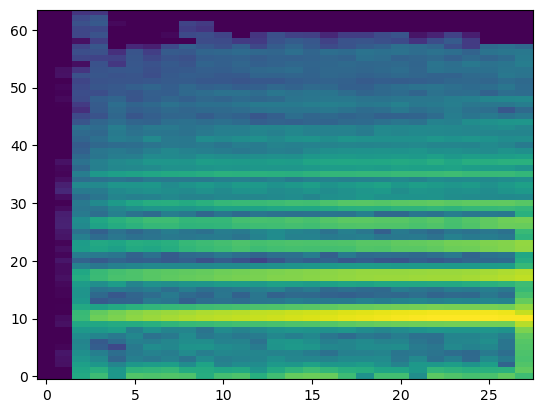

In [80]:
fig, ax = plt.subplots(1,1)

ax.imshow(test[0],aspect='auto',origin='lower',interpolation='nearest')

In [62]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 64

mel_spectrogram = transforms.MelSpectrogram(
    sample_rate=sample_rates[0],
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    n_mels=n_mels,
    mel_scale="htk",
)

melspec = mel_spectrogram(waveforms_trimmed[0])

In [56]:
def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")


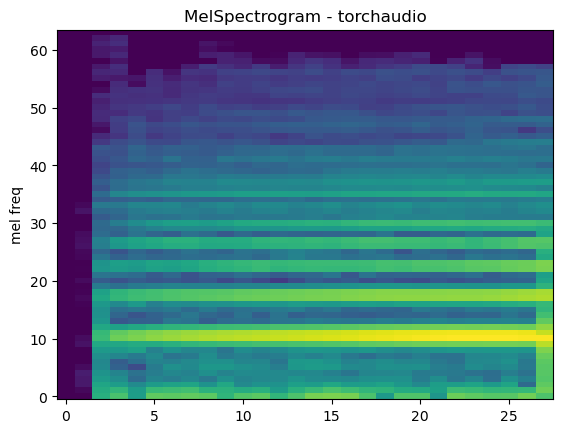

In [66]:
plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

In [64]:
melspec.shape

torch.Size([1, 64, 28])

In [61]:
test.shape

torch.Size([1, 64, 28])

In [69]:
test2 = librosa.power_to_db(melspec[0])

In [71]:
test2.shape

(64, 28)

In [73]:
test[0].shape

torch.Size([64, 28])

In [77]:
test[0]

tensor([[-67.7560, -67.7560, -19.5394,  ..., -10.7128,  -7.5202, -12.4736],
        [-67.7560, -67.7560, -20.6403,  ..., -16.9000, -16.4764,  -7.4998],
        [-67.7560, -64.2637, -22.7244,  ..., -22.9781, -42.0391,  -9.3557],
        ...,
        [-67.7560, -67.7560, -48.0112,  ..., -67.7560, -67.7560, -67.7560],
        [-67.7560, -67.7560, -50.0973,  ..., -67.7560, -67.7560, -67.7560],
        [-67.7560, -67.7560, -55.6781,  ..., -67.7560, -67.7560, -67.7560]])

In [75]:
test2

array([[-86.05585 , -86.05585 , -35.513214, ..., -26.686657, -23.494093,
        -28.447418],
       [-86.05585 , -84.213196, -36.846756, ..., -33.10647 , -32.682854,
        -23.706223],
       [-86.05585 , -80.702736, -39.163414, ..., -39.41716 , -58.478104,
        -25.794725],
       ...,
       [-86.05585 , -86.05585 , -78.17348 , ..., -86.05585 , -86.05585 ,
        -86.05585 ],
       [-86.05585 , -86.05585 , -80.49218 , ..., -86.05585 , -86.05585 ,
        -86.05585 ],
       [-86.05585 , -86.05585 , -86.05585 , ..., -86.05585 , -86.05585 ,
        -86.05585 ]], dtype=float32)

In [78]:
melspec

tensor([[[6.1674e-12, 2.4129e-10, 2.8098e-04,  ..., 2.1445e-03,
          4.4729e-03, 1.4297e-03],
         [9.8878e-12, 3.7904e-09, 2.0669e-04,  ..., 4.8905e-04,
          5.3916e-04, 4.2597e-03],
         [1.1687e-11, 8.5060e-09, 1.2124e-04,  ..., 1.1436e-04,
          1.4197e-06, 2.6335e-03],
         ...,
         [9.4700e-13, 1.2114e-10, 1.5228e-08,  ..., 1.1699e-13,
          1.1712e-13, 1.4016e-12],
         [2.0662e-15, 2.6996e-14, 8.9286e-09,  ..., 1.6255e-13,
          1.7245e-13, 3.1815e-12],
         [1.2735e-20, 7.3643e-16, 2.3412e-09,  ..., 2.8471e-13,
          2.7203e-13, 4.2811e-12]]])

In [79]:
test

tensor([[[-67.7560, -67.7560, -19.5394,  ..., -10.7128,  -7.5202, -12.4736],
         [-67.7560, -67.7560, -20.6403,  ..., -16.9000, -16.4764,  -7.4998],
         [-67.7560, -64.2637, -22.7244,  ..., -22.9781, -42.0391,  -9.3557],
         ...,
         [-67.7560, -67.7560, -48.0112,  ..., -67.7560, -67.7560, -67.7560],
         [-67.7560, -67.7560, -50.0973,  ..., -67.7560, -67.7560, -67.7560],
         [-67.7560, -67.7560, -55.6781,  ..., -67.7560, -67.7560, -67.7560]]])

In [83]:
grams = []

for w in waveforms_trimmed:
    sp = spectrogram(w,sr)
    grams.append(sp)

In [84]:
grams

[tensor([[[-67.7560, -67.7560, -19.5394,  ..., -10.7128,  -7.5202, -12.4736],
          [-67.7560, -67.7560, -20.6403,  ..., -16.9000, -16.4764,  -7.4998],
          [-67.7560, -64.2637, -22.7244,  ..., -22.9781, -42.0391,  -9.3557],
          ...,
          [-67.7560, -67.7560, -48.0112,  ..., -67.7560, -67.7560, -67.7560],
          [-67.7560, -67.7560, -50.0973,  ..., -67.7560, -67.7560, -67.7560],
          [-67.7560, -67.7560, -55.6781,  ..., -67.7560, -67.7560, -67.7560]]]),
 tensor([[[-4.7404e+01, -4.7404e+01, -4.7404e+01,  ..., -6.3399e-01,
            3.9873e-02,  4.1623e+00],
          [-4.7404e+01, -4.7404e+01, -4.7404e+01,  ..., -6.9372e+00,
           -8.0725e+00, -3.6132e+00],
          [-4.7404e+01, -4.7404e+01, -4.7404e+01,  ..., -1.7327e+01,
           -2.1255e+01, -9.1388e+00],
          ...,
          [-4.7404e+01, -4.7404e+01, -4.7404e+01,  ..., -4.7404e+01,
           -4.7404e+01, -4.7404e+01],
          [-4.7404e+01, -4.7404e+01, -4.7404e+01,  ..., -4.7404e+01,
  

In [86]:
from torch.utils.data import DataLoader, Dataset, random_split


In [87]:
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4


In [89]:
SoundDS(9,'3')